Objective:
Simulate asset price paths under the Merton jump–diffusion model and analyze how jumps affect path behaviour and return distributions relative to Black–Scholes.

In [7]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

from src.simulation import simulate_merton_paths


In [ ]:
S0 = 100.0
r = 0.05
T = 1.0
n_steps = 252
n_paths = 10000

# Same diffusion volatility
sigma = 0.18

# Black–Scholes (no jumps)
params_bs = dict(
    lam=0.0,
    mu_J=0.0,
    sigma_J=0.0
)

# Merton jump–diffusion
params_merton = dict(
    lam=0.8,
    mu_J=-0.35,
    sigma_J=0.25
)

In [21]:
paths_bs = simulate_merton_paths(
    S0, r, sigma,
    lam=params_bs["lam"],
    mu_J=params_bs["mu_J"],
    sigma_J=params_bs["sigma_J"],
    T=T,
    n_steps=n_steps,
    n_paths=n_paths,
    seed=42
)

paths_merton = simulate_merton_paths(
    S0, r, sigma,
    lam=params_merton["lam"],
    mu_J=params_merton["mu_J"],
    sigma_J=params_merton["sigma_J"],
    T=T,
    n_steps=n_steps,
    n_paths=n_paths,
    seed=42
)


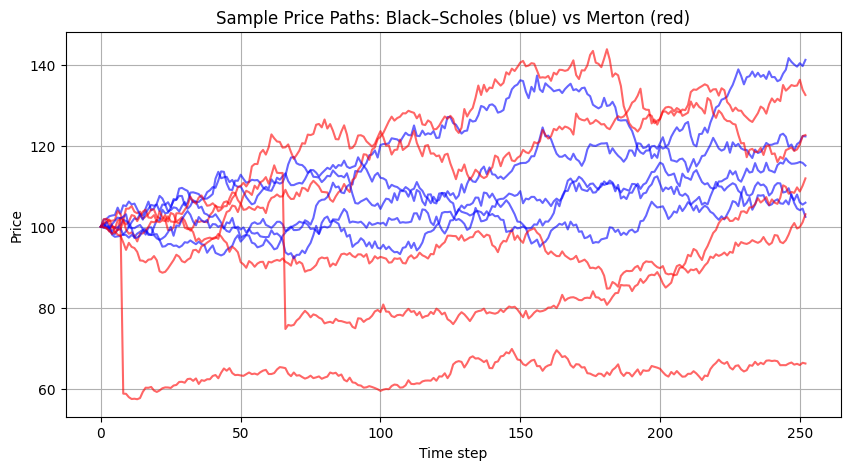

In [24]:
plt.figure(figsize=(10, 5))

for i in range(5):
    plt.plot(paths_bs[i], color="blue", alpha=0.6)
    plt.plot(paths_merton[i], color="red", alpha=0.6)

plt.title("Sample Price Paths: Black–Scholes (blue) vs Merton (red)")
plt.xlabel("Time step")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [25]:
def log_returns(paths):
    return np.diff(np.log(paths), axis=1).flatten()

rets_bs = log_returns(paths_bs)
rets_merton = log_returns(paths_merton)


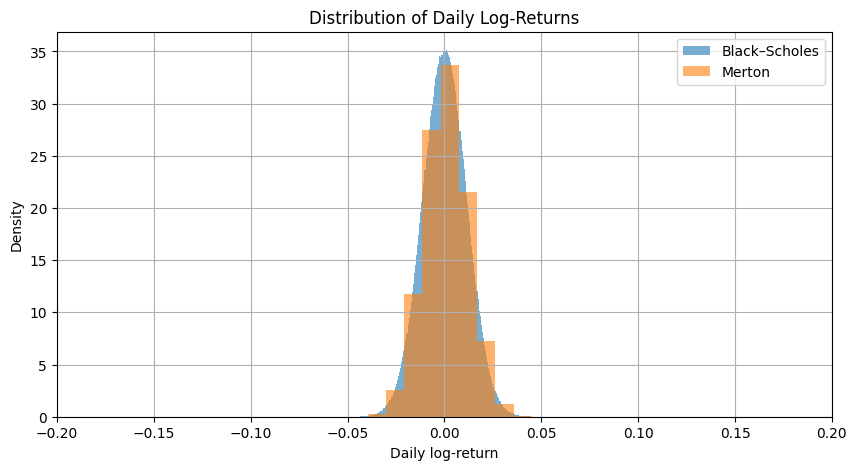

In [26]:
plt.figure(figsize=(10, 5))

plt.hist(rets_bs, bins=200, density=True, alpha=0.6, label="Black–Scholes")
plt.hist(rets_merton, bins=200, density=True, alpha=0.6, label="Merton")

plt.xlim(-0.2, 0.2)
plt.xlabel("Daily log-return")
plt.ylabel("Density")
plt.title("Distribution of Daily Log-Returns")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
def summarize(rets, name):
    print(f"{name}:")
    print("  Mean     :", np.mean(rets))
    print("  Std      :", np.std(rets))
    print("  Skewness :", skew(rets))
    print("  Kurtosis :", kurtosis(rets))
    print()

summarize(rets_bs, "Black–Scholes")
summarize(rets_merton, "Merton")


Black–Scholes:
  Mean     : 0.00012888804082967844
  Std      : 0.011347700778913493
  Skewness : -0.0005809606968125598
  Kurtosis : -0.00020350302188365532

Merton:
  Mean     : -0.0001297784145578948
  Std      : 0.02688192037688423
  Skewness : -17.821709731984107
  Kurtosis : 438.92491712877035



While Black–Scholes returns exhibit near-zero skewness and kurtosis consistent with Gaussian assumptions, the Merton jump–diffusion produces extremely negative skewness and explosive kurtosis. These effects are driven by rare but severe downward jumps, which dominate higher-order moments. This highlights why diffusion-only models dramatically underestimate tail risk and motivates the use of jump-based models in option pricing and risk management.